# CRYSTALpy tutorial

## CRYSTAL input

First, functions need to be imported. Since CRYSTALpy was installed via pip, python already knows where to find it. Therefore, all functions can be imported following this logic:

```console
from CRYSTALpy.module_name import function_name
```
In this first exercise, we need to use the Crystal_input class that sits in the crystal_io module:

In [1]:
from CRYSTALpy.crystal_io import Crystal_input

### Build the input from blocks

The first exercise will be creating and writing a CRYSTAL input file. We will see later a more convenient way to do this, but for now we are just going to pass CRYSTALpy a list of parameters that we need to build the input and then write it. This corresponds to manually writing to file, but instead of writing to file we are creating python lists (delimited by square brackets and using commas as separators):

In [2]:
geom_block = ['CRYSTAL\n',
             '0 0 0\n',
             '225\n',
             '4.217\n',
             '2\n',
             '12 0.    0.    0.\n',
             '8 0.5   0.5   0.5\n']
bs_block   = ['BASISSET\n','POB-DZVP\n']
func_block = ['DFT\n', 'B3LYP\n', 'XXLGRID\n', 'ENDDFT\n']
scf_block  = [['TOLINTEG\n', '7 7 7 7 14\n'],
             ['SHRINK\n', '12 24\n'],
             ['MAXCYCLE\n', '200\n'],
             ['FMIXING\n', '70\n'],
             'DIIS\n',
             'ENDSCF\n']
title = 'MgO CRYSTALpy tutorial' #optional

Then we need to create the Crystal_input object. This is called initialising the object:

In [3]:
mgo_input = Crystal_input()

If we try to see what mgo_input, by executing the following command:

In [4]:
print(mgo_input)

You can see this is an object of the class crystal_io.Crystal_input.

Now that the object has been initialised, we want to add information to it and that is when the lists we prepared earlier will be used. We are going to use the from_file function, which belongs to the Crystal_input class. If you are not familiar with python, you only need to know that if a function belongs to a class, it is called by adding .function_name() after the object created by the class. In this instance, mgo_input is an object of the Crystal_input class. Therefore, to use a function on it we will use:

```console
mgo_input.from_blocks()
```
We are first going to execute the command above and see the error message because it is very informative. 


In [5]:
#mgo_input.from_blocks()

This can be used everytime we are not sure about the arguments for a function. You should see that the from_blocks() takes four positional arguments. Positional, in this context means mandatory. There is also a fifth optional one, which is “title”. The reason why this is optional is because a default value has already been defined in the function itself.

Now we can run the command 

In [6]:
mgo_input.from_blocks(geom_block=geom_block, bs_block=bs_block, 
                                        func_block=func_block, scf_block=scf_block, title=title)

If we didn’t include title, CRYSTALpy would use “CRYSTALpy generated input” as first line of the input.

Now mgo_input will contain the information about the different blocks. We can test this by executing:

In [7]:
mgo_input.geom_block

['CRYSTAL\n',
 '0 0 0\n',
 '225\n',
 '4.217\n',
 '2\n',
 '12 0.    0.    0.\n',
 '8 0.5   0.5   0.5\n']

This displays the geom_block. 

You can also visualise the whole input by using:

In [8]:
mgo_input.print_input()

MgO CRYSTALpy tutorial
CRYSTAL
0 0 0
225
4.217
2
12 0.    0.    0.
8 0.5   0.5   0.5
BASISSET
POB-DZVP
DFT
B3LYP
XXLGRID
ENDDFT
TOLINTEG
7 7 7 7 14
SHRINK
12 24
MAXCYCLE
200
FMIXING
70
DIIS
ENDSCF


### Build the input from an existing .d12 file

If we already have a CRYSTAL input (.d12) saved to file, we can generate the Crystal_input object by reading this file. The .from_file function takes the path to the input file as an argument:

In [9]:
mgo_input_2 = Crystal_input()
mgo_input_2.from_file('data/mgo.d12')
mgo_input_2.print_input()

MGO BULK - GEOMETRY TEST
CRYSTAL
0 0 0
225
4.217
2
12 0.    0.    0.
8 0.5   0.5   0.5
END
12 4
0 0 8 2.0 1.0
 68370.0 0.0002226
 9661.0 0.001901
 2041.0 0.011042
 529.6 0.05005
 159.17 0.1690
 54.71 0.36695
 21.236 0.4008
 8.791 0.1487
0 1 5 8.0 1.0
 143.7 -0.00671 0.00807
 31.27 -0.07927 0.06401
 9.661 -0.08088 0.2092
 3.726 0.2947 0.3460
 1.598 0.5714 0.3731
0 1 1 2.0 1.0
 0.688 1.0 1.0
0 1 1 0.0 1.0
 0.28 1.0 1.0
8 4
0 0 8 2.0 1.0
 8020.0 0.00108
 1338.0 0.00804
 255.4 0.05324
 69.22 0.1681
 23.90 0.3581
 9.264 0.3855
 3.851 0.1468
 1.212 0.0728
0 1 4 6.0 1.0
 49.43 -0.00883 0.00958
 10.47 -0.0915 0.0696
 3.235 -0.0402 0.2065
 1.217 0.379 0.347
0 1 1 0.0 1.0
 0.4764 1.0 1.0
0 1 1 0.0 1.0
 0.1802 1.0 1.0
99 0
ENDBS
DFT
B3LYP
XXLGRID
ENDDFT
TOLINTEG
7 7 7 7 14
SHRINK
12 24
MAXCYCLE
200
FMIXING
70
DIIS
ENDSCF


### Manipulation of the CRYSTAL input

Once the Crystal_input object was created, we can use its class specific functions to modify it directly in this notebook.

The first task will be to transform the input, which is the one for an scf calculations, into a geometry optimisation one. We are going to use the .sp_to_opt() function:

In [10]:
mgo_input_2.sp_to_opt()

Since no arguments were passed to the function, only the OPTGEOM will be added:

In [11]:
mgo_input_2.geom_block

['CRYSTAL\n',
 '0 0 0\n',
 '225\n',
 '4.217\n',
 '2\n',
 '12 0.    0.    0.\n',
 '8 0.5   0.5   0.5\n',
 'OPTGEOM\n',
 'END\n',
 'END\n']

And now let's transform the input back into a single point calculation. 

**Can you guess what function will perform this task? If so, write in the cell below and print the geom_block to make sure it worked.**

In [12]:
mgo_input_2.opt_to_sp()
mgo_input_2.geom_block

['CRYSTAL\n',
 '0 0 0\n',
 '225\n',
 '4.217\n',
 '2\n',
 '12 0.    0.    0.\n',
 '8 0.5   0.5   0.5\n',
 'END\n']

**Now that you have seen how to use functions to act on the Crystal_input object, play with the other functions of the class. What information can be extracted from the Crystal_input object and what actions can be performed on the class?**

_Hint: in Jupyter Notebooks, if you click tab after object\_name. you will see a list of available functions and attributes._

In [13]:
#mgo_input.

### Write the CRYSTAL input to file

After generating and modifying the Crystal_input, the next step will be writing it to file. This is because CRYSTAL will need a .d12 input written to file in order to run the calculation. This will be done by using the 
```console
write_crystal_input()
```
This function is part of the crystal_io functions, but does not belong to any class. Therefore, it is called by simply using the function name and parsing its variables, as opposite to the functions that we have used so far. 

First, we will also need to import it since it is not part of the Crystal_input class:

Now we can can call the function. It takes two positional arguments:
- input_name: name of the file to be written
- crystal_input: Crystal_input object

In [14]:
input_name = 'data/mgo_input_tutorial.d12'
mgo_input.write_crystal_input(input_name)

We can verify the file was written and its content by using the following command, where the ! at the beginning of the line allows to execute bash commands from the Notebook:

In [15]:
! cat 'data/mgo_input_tutorial.d12'

MgO CRYSTALpy tutorial
CRYSTAL
0 0 0
225
4.217
2
12 0.    0.    0.
8 0.5   0.5   0.5
BASISSET
POB-DZVP
DFT
B3LYP
XXLGRID
ENDDFT
TOLINTEG
7 7 7 7 14
SHRINK
12 24
MAXCYCLE
200
FMIXING
70
DIIS
ENDSCF


### Set the runcry and runprop path (optional)

## CRYSTAL output

The same approach we used to read the input, can be applied to reading the CRYSTAL output.

**Can you guess what the class that reads the output is called? Please import it in the cell below.**

_Hint: What can you see if you type_
```console
from CRYSTALpy.crystal_io import
```
_and press Tab after the 'import' command? Can you see a class that might read the Crystal_output?_

In [16]:
from CRYSTALpy.crystal_io import Crystal_output

For this example we are going to use the 'data/mgo_optgeom.out'.

Like for the Crystal_input, we will first initialise the object and then read the file.

In [17]:
mgo_output = Crystal_output()
mgo_output.read_cry_output('data/mgo_optgeom.out')

In [18]:
mgo_output.get_last_geom()

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


[[[0.0, 2.12011000819, 2.12011000819],
  [2.12011000819, 0.0, 2.12011000819],
  [2.12011000819, 2.12011000819, 0.0]],
 [12, 8],
 [[0.0, 0.0, 0.0], [-2.12011000819, -2.12011000819, -2.12011000819]]]

Now that the mgo_output was created and the CRYSTAL output file was read, the functions belonging to the Crystal_object class can be used to extract information from the object itself.

For example, let's see what the final energy of the system is. For this we will use the function:

**Explore what other information can be extracted from the Crystal_output object by completing the code in the cell below:**

_Hint: remember the Tab key is your friend and that in python functions end with ()_

In [19]:
mgo_output.get_mulliken_charges()

[10.129, 9.871]

In [20]:
print('The dimensionality of the system is %s'%mgo_output.get_dimensionality())
print('The band gap of the system is %s eV'%mgo_output.get_band_gap())
print('The Fermi energy of the system is %s eV'%mgo_output.get_fermi_energy())

The dimensionality of the system is 3
The band gap of the system is 7.1237 eV
The Fermi energy of the system is -4.136710311917215 eV


In [21]:
#print('The dimensionality of the system is %s'%mgo_output.INSERT_FUNCTION_HERE)
#print('The band gap of the system is %s eV'%mgo_output.INSERT_FUNCTION_HERE)
#print('The Fermi energy of the system is %s eV'%mgo_output.INSERT_FUNCTION_HERE)

In the cell above, all functions return one value only (a scalar or an integer). Some other functions will return:
- other data structure, such as lists, for example the get_mulliken_charges() function
- more than one value/structure, for example the get_last_geom() function. Let's have a look at what we get back when we execute this function:

In [22]:
mgo_output.get_last_geom()

[[[0.0, 2.12011000819, 2.12011000819],
  [2.12011000819, 0.0, 2.12011000819],
  [2.12011000819, 2.12011000819, 0.0]],
 [12, 8],
 [[0.0, 0.0, 0.0], [-2.12011000819, -2.12011000819, -2.12011000819]]]

If you would like to know what these values are, the best approach is to have a look at the source code itself. This can be found at this <a href="https://github.com/crystal-code-tools/CRYSTALpy/blob/main/CRYSTALpy/crystal_io.py">link</a> (look for "get_last_geom").

You should see that the list returned at the end of the function, self.last_geom, contains three elements:
- the lattice vectors (2D list)
- the atomic numbers (list)
- the cartesian coordinates (list)

Therefore, a better way to extract information from this function is to assign the values as shown below:

In [23]:
lattice_vectors, atomic_numbers, cart_coords = mgo_output.get_last_geom()

In [24]:
lattice_vectors, atomic_numbers, cart_coords = mgo_output.get_last_geom()
print('The system\'s lattice vectors are:\n',lattice_vectors)
print('The system\'s atomic numbers are:\n',atomic_numbers)
print('The system\'s cartesian coordinates are:\n',cart_coords)

The system's lattice vectors are:
 [[0.0, 2.12011000819, 2.12011000819], [2.12011000819, 0.0, 2.12011000819], [2.12011000819, 2.12011000819, 0.0]]
The system's atomic numbers are:
 [12, 8]
The system's cartesian coordinates are:
 [[0.0, 0.0, 0.0], [-2.12011000819, -2.12011000819, -2.12011000819]]


For a full list of information that can be extracted from the Crystal_output object, please refer to <a href="https://github.com/crystal-code-tools/CRYSTALpy/blob/main/examples/crystal_io.ipynb">this example notebook</a>.

## Crystal_gui

The Crystal_gui class reads the CRYSTAL .gui (sometimes called .f34 or .optcxxx, where xxx is an integer in geometry optimisations). This object will be used in the convert module discussed below to generate ASE and pymatgen objects from CRYSTAL gui files

***Create a Crystal_gui object by reading the mgo_optgeom.gui file contained in the data folder. Then explore what its attributes and functions (if any) are.***

In [25]:
#from CRYSTALpy.crystal_io import Crystal_gui

In [26]:
#mgo_gui = Crystal_gui()
#mgo_gui.read_cry_gui('data/mgo_optgeom.gui')

In [27]:
#print('The lattice is: %s'%mgo_gui.lattice)
#print('The atom numbers are: %s'%mgo_gui.atom_number)
#print('The cartesian coordinates are: %s'%mgo_gui.atom_positions)

## properties input

The next class we are going to explore is the Properties_input class. This, as the name suggests, is used to create and modify inputs for the properties code. 

**Import the Properties_input in the cell below:**

In [28]:
from CRYSTALpy.crystal_io import Properties_input

### Band structure

Let's start by initialising the properties input object:

In [29]:
mgo_bands_input = Properties_input()

The CRYSTALpy module allows the user to define the band structure path in different ways. We are going to start with the simple approach of manually defining the fractional coordinate of the k points as a list of lists:

In [30]:
k_path = [[0,0,0],[0.5,0,0],[0.5,0.5,0.5],[0.25,0,0.5]]

We also need to define some more parameters to prepare the band structure input:

In [31]:
n_kpoints = 200 #number of points along the path
first_band = 1 
last_band = 26

We are now ready to create the property block for the band structure calculation:

In [32]:
mgo_bands_input.make_bands_block(k_path,n_kpoints, first_band, last_band)

As you can see in the cell above, CRYSTALpy transformed the fractional coordinates of the key points into the shrinking factor/integers structure used by CRYSTAL.

We will see later an even easier way to define the k point path by using the pymatgen module.

Often, before a properties calculation, we are interested in running a newk calculation. This is a block at the beginning of the properties input. It can be added to the Properties_input object by using:

In [33]:
mgo_bands_input.make_newk_block(12,24)

Where 12 and 24 define the k point grids

### Write the properties input to file

In [34]:
mgo_bands_input.write_properties_input('data/mgo_bands_tutorial.d3')

And let's confirm the input was written to file:

In [35]:
! cat data/mgo_bands_tutorial.d3

NEWK
12 24
1 0
BAND
BAND STRUCTURE CALCULATION
3 4 200 1 26 1 0
0 0 0  2 0 0
2 0 0  2 2 2
2 2 2  1 0 2
END


### Density of states

**Write the input for a MgO PDOS calculation, both with atom and AO projection**

_If you are unsure about the parameters for the function, try to see what the error message is when you don't specify any. The projections are lists of lists._

In [36]:
#mgo_pdos = Properties_input()
#mgo_pdos.make_pdoss_block([[1],[2]],proj_type='atom', e_range=[-5,10])

In [37]:
#mgo_pdos = Properties_input()
#mgo_pdos.make_pdoss_block([[1,2,3,4,5,6,7,8,9,10,11,12,13],
#                           [14,15,16,17,18,19,20,21,22,23,24,25,26]],proj_type='ao', e_range=[-5,10])

## properties output

The CRYSTALpy module allows the user to read a large variety of properties outputs. The full list can be found at (INSERT LINK TO DOC).

The logic follows the Crystal_output class, with the difference that different types output will be read depending on what the property is. The main goal of a properties object will be plotting, so let's start by creating the object and then move onto plotting.

***At this stage you should be familiar with the importing the class, initialisation, reading file, extracting properties logic. In the data folder there are the output files for:***
- ***band structure (data/mgo_BAND_dat.BAND)***
- ***density of states (mgo_DOSS_dat.DOSS)***
- ***LET'S ADD A CONTOUR PLOT***

In [38]:
from CRYSTALpy.crystal_io import Properties_output

In [39]:
mgo_bands_output = Properties_output()
mgo_bands_output.read_cry_bands('data/mgo_BAND_dat.BAND')

In [40]:
mgo_doss_output = Properties_output()
mgo_doss_output.read_cry_doss('data/mgo_DOSS_dat.DOSS')

## Plot the properties

The plotting functions are collected in the plot module, we will, therefore, procede to import both the bands and doss plotting functions.

In [41]:
from CRYSTALpy.plot import plot_cry_bands, plot_cry_doss

As you can imagine, there are plenty of settings that can be twicked in a plot. The plotting functions will have many preset values that can be modified when executing the function. In order to see all the parameters, the best way is to have a look at the source code <a href="https://github.com/crystal-code-tools/CRYSTALpy/blob/main/CRYSTALpy/plot.py">here</a>. If there is also some more parameter you would like the plotting functions to implement, please feel free to add and submit a pull request on GitHub, or get in touch with us.

Let's start by plotting the band structure:

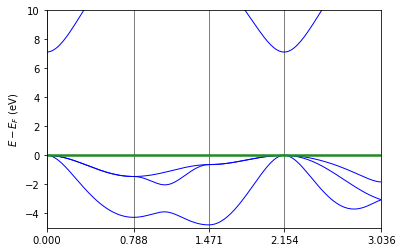

In [42]:
plot_cry_bands(mgo_bands_output, energy_range=[-5,10])

***And now you should be able to plot the DOSS***

## Conversion to <a href="https://pymatgen.org/index.html">pymatgen</a> and <a href="https://wiki.fysik.dtu.dk/ase/">ASE</a>

So far we have explored the functions that create the Crystal_objects. Now, we are going to focus on the functions that transform the Crystal_objects into <a href="https://wiki.fysik.dtu.dk/ase/ase/atoms.html">ASE Atoms</a> objects and <a href="https://pymatgen.org/pymatgen.core.structure.html">pymatgen Structure</a> objects. Atoms and Structures are the name of the central data structure in ASE and pymatgen, respectively.

These functions play the very important role of allowing the user to connect a CRYSTAL input/output to very well developed and maintained distributions, such as ASE and pymatgen. These two distributions have plenty of functions that can make wonders in modifying, analysing and visualising structures.

In [43]:
from CRYSTALpy.convert import * 

### gui -> pymatgen

Let's start by transforming a gui file into a pymatgen object. First we need to create the Crystal_gui object

In [44]:
from CRYSTALpy.crystal_io import Crystal_gui

In [45]:
mgo_gui = Crystal_gui()
mgo_gui.read_cry_gui('data/mgo_optgeom.gui')

In [46]:
mgo_pmg = cry_gui2pmg(mgo_gui)


Let's then transform the gui object into the pymatgen Structure object and print it.

In [47]:
mgo_pmg = cry_gui2pmg(mgo_gui)
mgo_pmg

Structure Summary
Lattice
    abc : 2.998288327305232 2.998288327305232 2.998288327305232
 angles : 59.99999999999999 59.99999999999999 59.99999999999999
 volume : 19.059222678792402
      A : 0.0 2.12011000819 2.12011000819
      B : 2.12011000819 0.0 2.12011000819
      C : 2.12011000819 2.12011000819 0.0
PeriodicSite: Mg (0.0000, 0.0000, 0.0000) [0.0000, 0.0000, 0.0000]
PeriodicSite: O (-2.1201, -2.1201, -2.1201) [-0.5000, -0.5000, -0.5000]

In [48]:
mgo_gui2 = cry_pmg2gui(mgo_pmg)

In [49]:
mgo_gui2.write_crystal_gui('path_to_file')

The pymatgen package contains a wide range of objects and functions to modify and analyse periodic structures. If you are interested in its functionality, please refer to the <a href="https://pymatgen.org/">documentation page </a>.

### out -> pymatgen

***Following the logic discussed for the gui files, create a pymatgen object starting from the mgo_optgeom.out file contained in the data folder.***

In [50]:
mgo_out = Crystal_output()
mgo_out.read_cry_output('data/mgo_optgeom.out')
mgo_pmg_out = cry_out2pmg(mgo_out)
mgo_pmg_out

Structure Summary
Lattice
    abc : 2.998288327305232 2.998288327305232 2.998288327305232
 angles : 59.99999999999999 59.99999999999999 59.99999999999999
 volume : 19.059222678792402
      A : 0.0 2.12011000819 2.12011000819
      B : 2.12011000819 0.0 2.12011000819
      C : 2.12011000819 2.12011000819 0.0
PeriodicSite: Mg (0.0000, 0.0000, 0.0000) [0.0000, 0.0000, 0.0000]
PeriodicSite: O (-2.1201, -2.1201, -2.1201) [-0.5000, -0.5000, -0.5000]

### pymatgen -> gui

In order to be able to use the great functionalities implemented in ASE and pymatgen, we also need to be able to write a gui file from those two packages. First a pymatgen object (mgo_pmg_obj) is defined. This follows the pymatgen syntax, which is not in scope for this tutorial, more information can be found <a href="https://pymatgen.org/usage.html#structures-and-molecules">here</a>.

In [51]:
from pymatgen.core.surface import Structure, Lattice

lattice = Lattice.cubic(3.)
mgo_pmg_obj = Structure(lattice, ["Mg", "O"],
               [[0,0,0], [.5,.5,.5]])

Now let's transform the pymatgen Structure object into the Crystal_gui object and then write it to file:

In [52]:
mgo_gui_tutorial = cry_pmg2gui(mgo_pmg_obj, symmetry=True)
mgo_gui_tutorial.write_crystal_gui('data/mgo_gui_from_pmg.gui')

And let's confirm the structure was written to the gui file:

In [53]:
! cat data/mgo_gui_from_pmg.gui

3   1   1
3.000000000000E+00 0.000000000000E+00 0.000000000000E+00
0.000000000000E+00 3.000000000000E+00 0.000000000000E+00
0.000000000000E+00 0.000000000000E+00 3.000000000000E+00
48
1.000000000000E+00 0.000000000000E+00 0.000000000000E+00
0.000000000000E+00 1.000000000000E+00 0.000000000000E+00
0.000000000000E+00 0.000000000000E+00 1.000000000000E+00
0.000000000000E+00 0.000000000000E+00 0.000000000000E+00
-1.000000000000E+00 0.000000000000E+00 0.000000000000E+00
0.000000000000E+00 -1.000000000000E+00 0.000000000000E+00
0.000000000000E+00 0.000000000000E+00 -1.000000000000E+00
0.000000000000E+00 0.000000000000E+00 0.000000000000E+00
0.000000000000E+00 -1.000000000000E+00 0.000000000000E+00
1.000000000000E+00 0.000000000000E+00 0.000000000000E+00
0.000000000000E+00 0.000000000000E+00 1.000000000000E+00
0.000000000000E+00 0.000000000000E+00 0.000000000000E+00
0.000000000000E+00 1.000000000000E+00 0.000000000000E+00
-1.000000000000E+00 0.000000000000E+00 0.000000000000E+00
0.00000000000

### gui -> ASE

The ASE package also contains a wide range of objects and functions to modify, analyse and visualise periodic structures. If you are interested in its functionality, please refer to the <a href="https://wiki.fysik.dtu.dk/ase/tutorials/tutorials.html">documentation page </a>.

***Following the logic discussed above, create an ASE object starting from the mgo_optgeom.gui file contained in the data folder.***

In [54]:
mgo_gui = Crystal_gui()
mgo_gui.read_cry_gui('data/mgo_optgeom.gui')
mgo_ase = cry_gui2ase(mgo_gui)
mgo_ase

Atoms(symbols='MgO', pbc=True, cell=[[0.0, 2.12011000819, 2.12011000819], [2.12011000819, 0.0, 2.12011000819], [2.12011000819, 2.12011000819, 0.0]])

### ASE -> gui

Similarly to the pytmatgen -> gui example, we are first going to create an <a href="https://wiki.fysik.dtu.dk/ase/ase/atoms.html">ASE Atoms object</a>.

In [55]:
from ase.build import bulk
copper_ase = bulk('Cu', 'fcc', a=3.6)

***Following the logic discussed above for the pymatgen -> gui example, save the copper structure to a gui file.***

In [56]:
#copper_gui_tutorial = cry_ase2gui(copper_ase, symmetry=True)
#write_crystal_gui('data/copper_from_ase.gui',copper_gui_tutorial)

In [57]:
#! cat data/copper_from_ase.gui

### out -> ASE

***Following the logic discussed above, create an ASE object starting from the mgo_optgeom.out file contained in the data folder.***

In [58]:
mgo_out = Crystal_output()
mgo_out.read_cry_output('data/mgo_optgeom.out')
mgo_ase = cry_out2ase(mgo_out)
mgo_ase

Atoms(symbols='MgO', pbc=True, cell=[[0.0, 2.12011000819, 2.12011000819], [2.12011000819, 0.0, 2.12011000819], [2.12011000819, 2.12011000819, 0.0]])

## Saving structure files (.cif and .xyz)

The convert module also contains functions that allow you to save Crystal_gui and Crystal_output objects into .cif and .xyz files for periodic systems and molecules, respectively. These functions take the file name of the cif/xyz that is going to be saved as the first argument.

In [59]:
from CRYSTALpy.convert import cry_gui2cif, cry_out2cif, cry_gui2xyz, cry_out2xyz

### gui -> .cif

In [60]:
mgo_gui = Crystal_gui()
mgo_gui.read_cry_gui('data/mgo_optgeom.gui')
cif_file_name = 'data/mgo_optgeom.cif'
cry_gui2cif(cif_file_name,mgo_gui)

And now let's check the file was written to file.

In [61]:
! cat data/mgo_optgeom.cif

# generated using pymatgen
data_MgO
_symmetry_space_group_name_H-M   'P 1'
_cell_length_a   2.99828833
_cell_length_b   2.99828833
_cell_length_c   2.99828833
_cell_angle_alpha   60.00000000
_cell_angle_beta   60.00000000
_cell_angle_gamma   60.00000000
_symmetry_Int_Tables_number   1
_chemical_formula_structural   MgO
_chemical_formula_sum   'Mg1 O1'
_cell_volume   19.05922268
_cell_formula_units_Z   1
loop_
 _symmetry_equiv_pos_site_id
 _symmetry_equiv_pos_as_xyz
  1  'x, y, z'
loop_
 _atom_site_type_symbol
 _atom_site_label
 _atom_site_symmetry_multiplicity
 _atom_site_fract_x
 _atom_site_fract_y
 _atom_site_fract_z
 _atom_site_occupancy
  Mg  Mg0  1  0.00000000  0.00000000  0.00000000  1
  O  O1  1  -0.50000000  -0.50000000  -0.50000000  1


***Would you be able to save the structure contained in mgo_optgeon.out as a cif file?***